<a href="https://colab.research.google.com/github/AJAV-TIP/DATA-ANALYSIS/blob/main/An%C3%A1lisis_de_normalidad_(Pn_Vis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar librerías y datos

Tomado de: [cienciadedatos.net](https://www.cienciadedatos.net/documentos/pystats06-analisis-normalidad-python.html)

In [3]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [4]:
url = ('https://raw.githubusercontent.com/AJAV-TIP/DATA-ANALYSIS/main/PnvsVis_Data.csv')
datos=pd.read_csv(url)
print(datos.info())
datos.head(4)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Viscosity   685 non-null    int64
 1   Peetration  685 non-null    int64
dtypes: int64(2)
memory usage: 10.8 KB
None


,Viscosity,Peetration
0,2706,59
1,2892,60
2,2964,59
3,2975,61


#Viscosidad 

In [5]:
vis = datos['Viscosity']

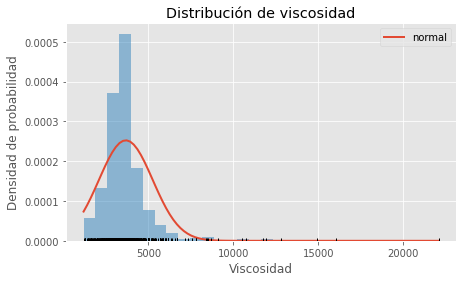

In [6]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(vis)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(vis), max(vis), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=vis, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(vis, np.full_like(vis, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de viscosidad')
ax.set_xlabel('Viscosidad')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

Otra representación utilizada con frecuencia son los gráficos de cuantiles teóricos (Gráficos Q-Q). Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

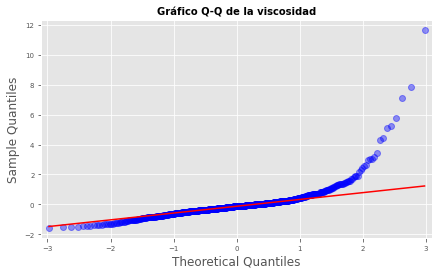

In [7]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    vis,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de la viscosidad', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

#1/Viscosidad

In [8]:
inv_vis=1/vis

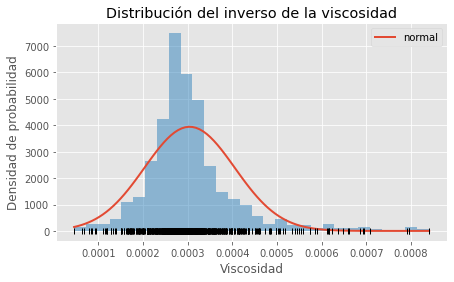

In [9]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(inv_vis)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(inv_vis), max(inv_vis), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=inv_vis, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(inv_vis, np.full_like(inv_vis, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del inverso de la viscosidad')
ax.set_xlabel('Viscosidad')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

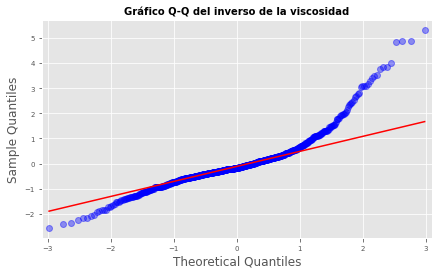

In [10]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    inv_vis,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del inverso de la viscosidad', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

#Penetración

In [11]:
pn = datos['Peetration']

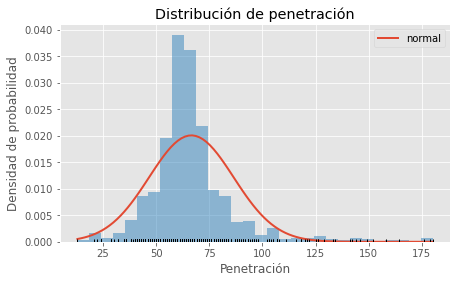

In [12]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(pn)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(pn), max(pn), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=pn, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(pn, np.full_like(pn, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de penetración')
ax.set_xlabel('Penetración')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

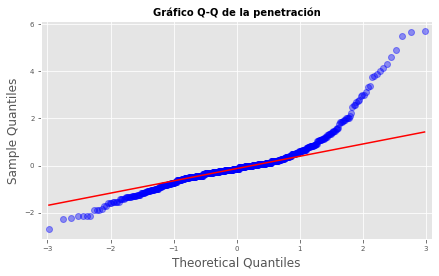

In [13]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    pn,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de la penetración', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

#Segmentación 


##Viscosidad

In [24]:
vis_val=2700


###Menor

In [25]:
datos_menor = datos[(datos.Viscosity < vis_val)]
vis_menor = 1/datos_menor['Viscosity']
len(vis_menor)

109

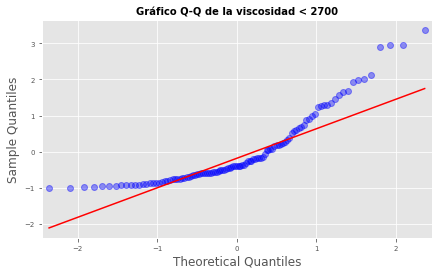

In [26]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    vis_menor,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title(('Gráfico Q-Q de la viscosidad < ' + str(vis_val)), fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

###Mayor

In [27]:
datos_mayor = datos[(datos.Viscosity > vis_val)]
vis_mayor = 1/datos_mayor['Viscosity']
len(vis_mayor)

576

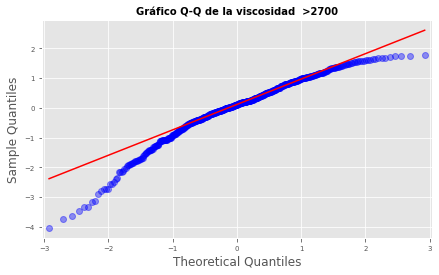

In [28]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    vis_mayor,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title(('Gráfico Q-Q de la viscosidad  >' + str(vis_val)), fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

##Penetración

In [29]:
pn_val=110

###Menor

In [30]:
datosp_menor = datos[(datos.Peetration < pn_val)]
pn_menor = datosp_menor['Peetration']
len(pn_menor)

661

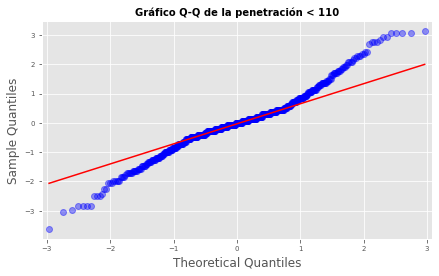

In [31]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    pn_menor,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title(('Gráfico Q-Q de la penetración < '+ str(pn_val)), fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

###Mayor

In [32]:
datosp_mayor = datos[(datos.Peetration > pn_val)]
pn_mayor = datosp_mayor['Peetration']
len(pn_mayor)

24

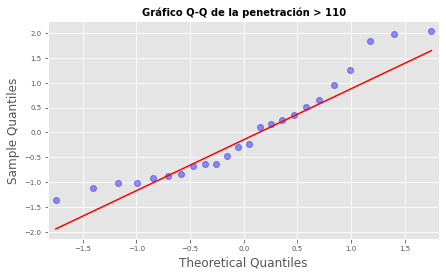

In [33]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    pn_mayor,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title(('Gráfico Q-Q de la penetración > '+ str(pn_val)), fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)